In [62]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data = torchvision.datasets.MNIST(root='.',
                           train = True,
                           transform = transforms.ToTensor(),
                           download=True)

In [13]:
test_data = torchvision.datasets.MNIST(root='.',
                                       train=False,
                                       transform = transforms.ToTensor(),
                                       download=True)

In [15]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [16]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [19]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,10),
    nn.Softmax()
)

In [20]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): Softmax(dim=None)
)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [23]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = batch_size,
                                          shuffle = False
                                          )

In [51]:
epoches = 20

train_losses = []
test_losses = []

for i in range(epoches):
  train_loss = []
  test_loss = []

  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = torch.reshape(inputs, (-1, 784))
    optimizer.zero_grad()
    outs = model(inputs)
    loss = criterion(outs, targets)
    train_loss.append(loss.item())
    loss.backward()
    optimizer.step()

  train_losses.append(np.mean(train_loss))

  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = torch.reshape(inputs, (-1, 784))
    outs = model(inputs)
    loss = criterion(outs, targets)
    test_loss.append(loss.item())

  test_losses.append(np.mean(test_loss))






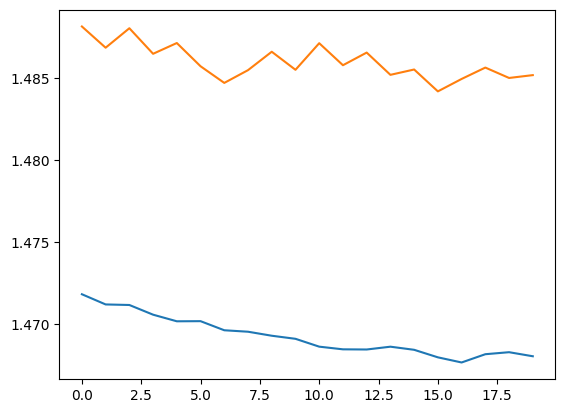

In [52]:
plt.plot(train_losses)
plt.plot(test_losses)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


<Axes: >

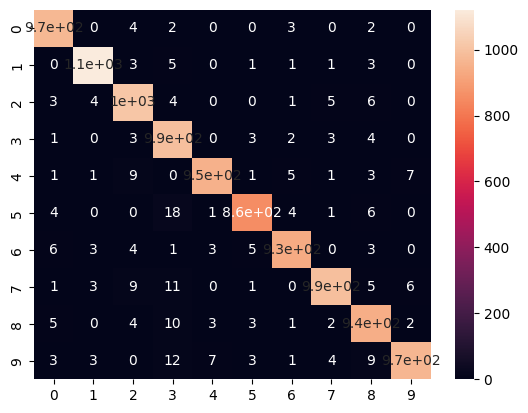

In [64]:
from sklearn.metrics import confusion_matrix

x_test = test_data.data.numpy()
y_test = test_data.targets.numpy()

preds = model(torch.reshape(test_data.data.to(device).to(torch.float32),(-1,784)))

_, y_pred = torch.max(preds, 1)

sns.heatmap(confusion_matrix(y_test, y_pred.cpu()), annot=True)